In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import extcolors
import pandas as pd

In [2]:
def rgb2hex(r, g, b):
    return ('#{:X}{:X}{:X}').format(r, g, b)

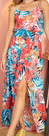

In [4]:
input_name = '/Users/valentinafeve/Projects/Close/datasets/dataset20mar_cropped/images/1777025235050470400/-5973925925063238443.png'
output_width = 100                   #set the output size
img = Image.open(input_name)
img

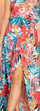

In [5]:
# Get the size of the image
width, height = img.size

# Calculate the crop size
crop_size = (int(width * 0.09), int(height * 0.09), int(width * 0.91), int(height * 0.91))

# Crop the image
img = img.crop(crop_size)
img

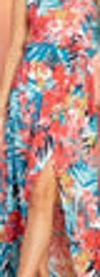

In [6]:
wpercent = (output_width/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((output_width,hsize))
img

In [12]:
colors_x = extcolors.extract_from_image(img, tolerance = 10, limit = 6)
colors_x

([((227, 156, 126), 2996),
  ((240, 197, 163), 1536),
  ((239, 167, 159), 1344),
  ((251, 109, 101), 1134),
  ((150, 210, 220), 986),
  ((103, 162, 174), 962)],
 27700)

In [13]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]

    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                           int(i.split(", ")[1]),
                           int(i.split(", ")[2].replace(")",""))) for i in df_rgb]

    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#E39C7E,2996
1,#F0C5A3,1536
2,#EFA79F,1344
3,#FB6D65,1134
4,#96D2DC,986


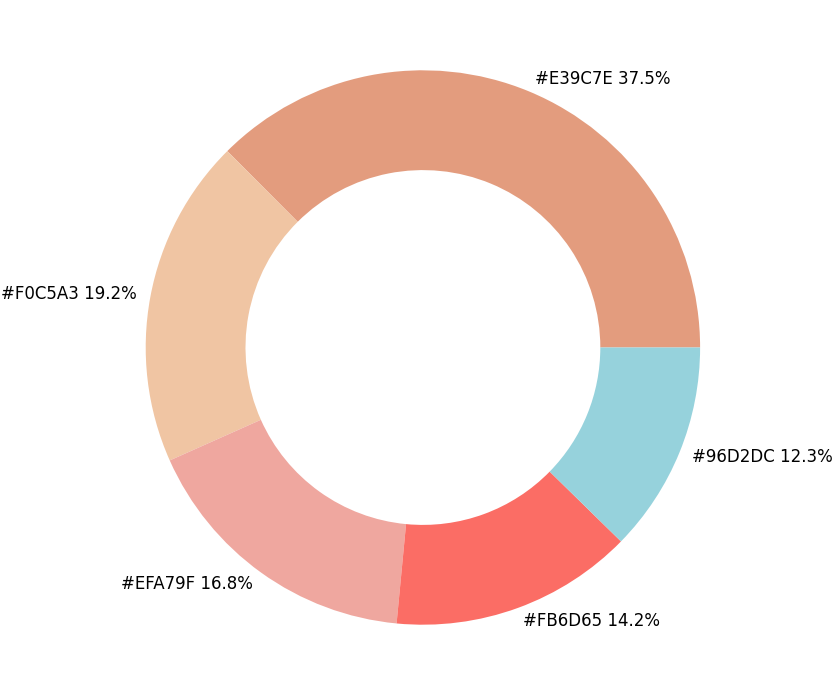

In [14]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                      )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()